In [30]:
import numpy as np
from matplotlib.pyplot import (figure, imshow, bar, title, xticks, yticks, cm,
                               subplot, show, plot)
from scipy.io import loadmat
from toolbox_02450 import gausKernelDensity
from sklearn.neighbors import NearestNeighbors
from matplotlib.pyplot import figure, show, legend
import numpy as np
from scipy.io import loadmat
from toolbox_02450 import clusterplot
from sklearn.mixture import GaussianMixture
from sklearn import model_selection
from matplotlib.pyplot import figure, plot, legend, xlabel, show



###### Get data using 
import ProstateDataHandler2
import seaborn as sns
import report_PCA
import ML_plotter


# Creating object to handle data load and feature transformation
myData = ProstateDataHandler2.ProstateData()

raw_data = myData.get_rawData()


# Preparing attribute names
attributeNames = myData.get_attributeNames()
classLabels, classNames, classDict = myData.get_classLabels()
C = len(classNames)

# Generating X & Y and dimensionality
N, M, X, y = myData.get_ClassificationFeatureData()

DataHandler for Prostate data initialized
Attribute Names in data set are: ['lCaVol', 'lWeight', 'Age', 'lBPH', 'lCP', 'Gleason 6.0', 'Gleason 7.0', 'Gleason 8.0', 'Gleason 9.0', 'SVI']
There are 10 features in the data set
There are 97 observations in the data set
X has shape (97, 10)
y has shape (97,)


In [31]:
print(y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1.]


Performing PCA on the Prostate Dataset


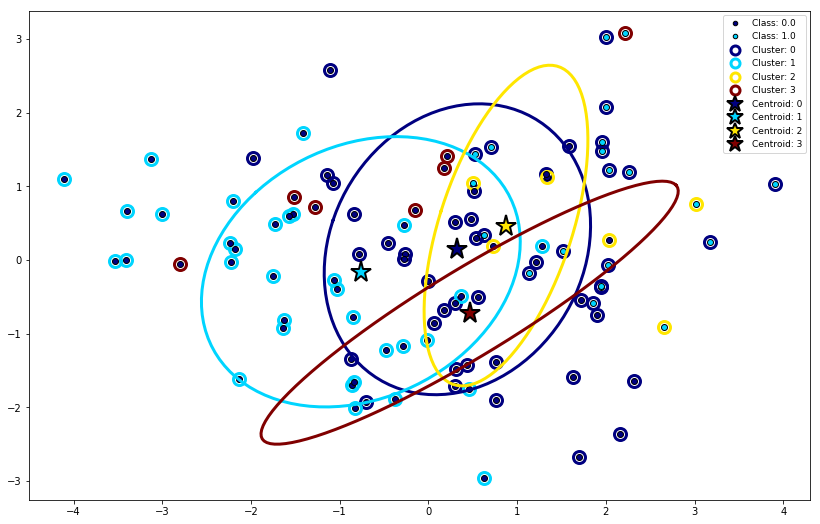

In [52]:
import report_PCA
prostatePCA = report_PCA.prostatePCA(X=X)
X_pca=prostatePCA.get_principal_components(n_pca=2)

# Number of clusters
K = 4
cov_type = 'full'       
# type of covariance, you can try out 'diag' as well
reps = 10
# number of fits with different initalizations, best result will be kept
# Fit Gaussian mixture model
gmm = GaussianMixture(n_components=K, covariance_type=cov_type, n_init=reps).fit(X)
cls = gmm.predict(X)    
# extract cluster labels
cds = gmm.means_        
# extract cluster centroids (means of gaussians)
covs = gmm.covariances_
# extract cluster shapes (covariances of gaussians)
if cov_type.lower() == 'diag':
    new_covs = np.zeros([K,M,M])    
    
    count = 0    
    for elem in covs:
        temp_m = np.zeros([M,M])
        new_covs[count] = np.diag(elem)
        count += 1

    covs = new_covs

# Plot results:
# figure(figsize=(14,9))
# clusterplot(X, clusterid=cls, centroids=cds, y=y, covars=covs)
# show()

## In case the number of features != 2, then a subset of features most be plotted instead.
figure(figsize=(14,9))
idx = [0,1] # feature index, choose two features to use as x and y axis in the plot


clusterplot(X_pca, clusterid=cls, centroids=cds[:,idx], y=y, covars=covs[:,idx,:][:,:,idx])

#clusterplot(X[:,idx], clusterid=cls, centroids=cds[:,idx], y=y, covars=covs[:,idx,:][:,:,idx])
show()

Fitting model for K=1
Fitting model for K=2
Fitting model for K=3
Fitting model for K=4
Fitting model for K=5
Fitting model for K=6
Fitting model for K=7
Fitting model for K=8
Fitting model for K=9


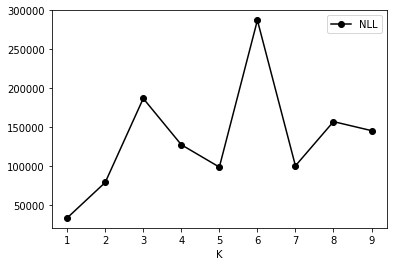

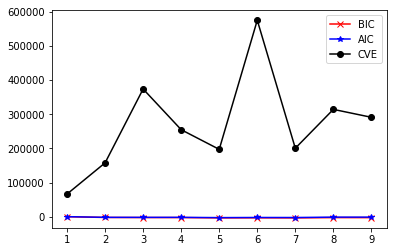

In [78]:
# Range of K's to try
KRange = range(1,10)
T = len(KRange)

covar_type = 'full'     # you can try out 'diag' as well
reps = 5                # number of fits with different initalizations, best result will be kept

# Allocate variables
BIC = np.zeros((T,))
AIC = np.zeros((T,))
CVE = np.zeros((T,))

# K-fold crossvalidation
CV = model_selection.KFold(n_splits=5,shuffle=True)

for t,K in enumerate(KRange):
        print('Fitting model for K={0}'.format(K))

        # Fit Gaussian mixture model
        gmm = GaussianMixture(n_components=K, covariance_type=covar_type, n_init=reps).fit(X)
        
        BIC[t,] = gmm.bic(X)
        AIC[t,] = gmm.aic(X)
        
        # For each crossvalidation fold
        for train_index, test_index in CV.split(X):

            # extract training and test set for current CV fold
            X_train = X[train_index]
            X_test = X[test_index]

            # Fit Gaussian mixture model to X_train
            gmm = GaussianMixture(n_components=K, covariance_type=covar_type, n_init=reps).fit(X_train)

            # compute negative log likelihood of X_test
            CVE[t] += -gmm.score(X_test).sum()
            
            # Get BIC and AIC
            #BIC[t] += gmm.bic(X_test).sum()
            #AIC[t] += gmm.aic(X_test).sum()
            

# Plot results

figure(1); 
plot(KRange, CVE,'-ok')

legend(['NLL'])
xlabel('K')
show()

figure(2)
plot(KRange, AIC,'-xr')
plot(KRange, BIC,'-*b')
plot(KRange, 2*CVE,'-ok')
legend(['BIC', 'AIC', 'CVE'])


In [73]:
print(AIC)

[  434.72727537 -1757.51802735 -1988.45183399 -2147.61755063
 -2832.22089329 -2572.56890313 -3039.49551488 -2788.27855534
 -3191.61572489]
